In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Code/NLP

/content/gdrive/MyDrive/Code/NLP


In [ ]:
%ls

RNN_LSTM.ipynb


# Data

In [ ]:
import tensorflow as tf

In [ ]:
max_feature = 20000
maxlen = 500

In [ ]:
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.imdb.load_data(num_words=max_feature)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = tf.keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)

17464789/17464789 [==============================] - 0s 0us/step
25000 Training sequences
25000 Validation sequences


# Model - Training

## RNN

In [ ]:
# Input for variable-length sequences of integers
inputs = tf.keras.Input(shape=(maxlen,), dtype="int32")

# Embed each integer in a 128-dimensional vector
x = tf.keras.layers.Embedding(max_feature, 128)(inputs)

# Add 2 SimpleRNN
# x = tf.keras.layers.SimpleRNN(64, return_sequences=True)(x)
x = tf.keras.layers.SimpleRNN(64)(x)

# Add a classifier
dense1 = tf.keras.layers.Dense(32, activation="relu")(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(dense1)
model_RNN = tf.keras.Model(inputs, outputs)
model_RNN.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding (Embedding)       (None, 500, 128)          2560000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                12352     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,574,465
Trainable params: 2,574,465
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_RNN.compile(optimizer="adam", loss = "binary_crossentropy", metrics=["accuracy"])
history_RNN = model_RNN.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_data = (x_val, y_val))

Epoch 1/10
782/782 [==============================] - 537s 679ms/step - loss: 0.5775 - accuracy: 0.6814 - val_loss: 0.6428 - val_accuracy: 0.7118
Epoch 2/10
782/782 [==============================] - 481s 615ms/step - loss: 0.4653 - accuracy: 0.7801 - val_loss: 0.4762 - val_accuracy: 0.8018
Epoch 3/10
782/782 [==============================] - 467s 597ms/step - loss: 0.3711 - accuracy: 0.8269 - val_loss: 0.6355 - val_accuracy: 0.6438
Epoch 4/10
782/782 [==============================] - 455s 582ms/step - loss: 0.4572 - accuracy: 0.7785 - val_loss: 0.5956 - val_accuracy: 0.7192
Epoch 5/10
782/782 [==============================] - 463s 592ms/step - loss: 0.2958 - accuracy: 0.8789 - val_loss: 0.4846 - val_accuracy: 0.8074
Epoch 6/10
782/782 [==============================] - 459s 587ms/step - loss: 0.2207 - accuracy: 0.9145 - val_loss: 0.5818 - val_accuracy: 0.7343
Epoch 7/10
782/782 [==============================] - 457s 584ms/step - loss: 0.1539 - accuracy: 0.9447 - val_loss: 0.6084 -

<Figure size 1000x1000 with 0 Axes>

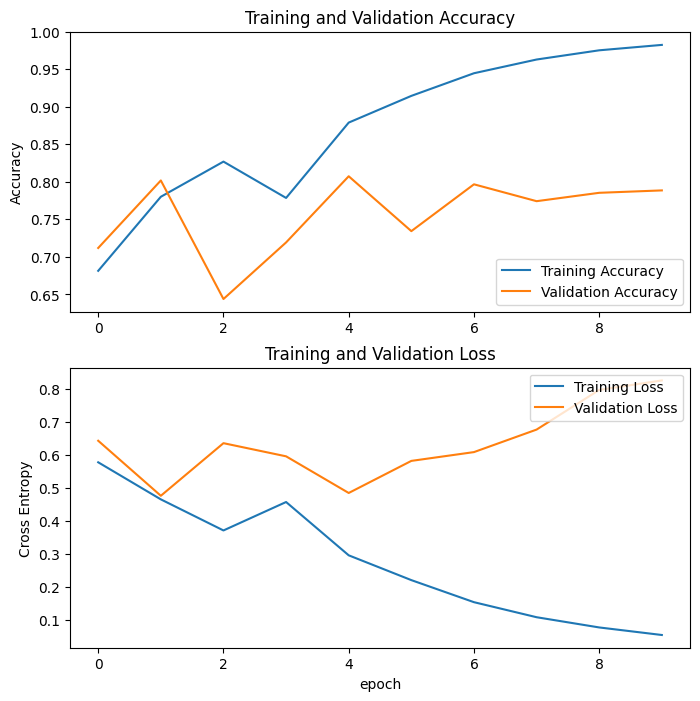

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

acc = history_RNN.history['accuracy']
val_acc = history_RNN.history['val_accuracy']

loss = history_RNN.history['loss']
val_loss = history_RNN.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## LTSM

In [ ]:
# Input for variable-length sequences of integers
inputs = tf.keras.Input(shape=(maxlen,), dtype="int32")

# Embed each integer in a 128-dimensional vector
x = tf.keras.layers.Embedding(max_feature, 128)(inputs)

# Add 2 SimpleRNN
# x = tf.keras.layers.LSTM(64, return_sequences=True)(x)
x = tf.keras.layers.LSTM(64)(x)

# Add a classifier
dense1 = tf.keras.layers.Dense(32, activation="relu")(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(dense1)
model_LSTM = tf.keras.Model(inputs, outputs)
model_LSTM.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 500, 128)          2560000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,611,521
Trainable params: 2,611,521
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_LSTM.compile(optimizer="adam", loss = "binary_crossentropy", metrics=["accuracy"])
history_LSTM = model_LSTM.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_data = (x_val, y_val))

Epoch 1/10
782/782 [==============================] - 107s 132ms/step - loss: 0.4054 - accuracy: 0.8156 - val_loss: 0.3598 - val_accuracy: 0.8622
Epoch 2/10
782/782 [==============================] - 52s 66ms/step - loss: 0.2262 - accuracy: 0.9112 - val_loss: 0.3320 - val_accuracy: 0.8662
Epoch 3/10
782/782 [==============================] - 37s 48ms/step - loss: 0.1453 - accuracy: 0.9457 - val_loss: 0.3499 - val_accuracy: 0.8707
Epoch 4/10
782/782 [==============================] - 29s 38ms/step - loss: 0.0814 - accuracy: 0.9718 - val_loss: 0.4183 - val_accuracy: 0.8650
Epoch 5/10
782/782 [==============================] - 26s 33ms/step - loss: 0.0686 - accuracy: 0.9768 - val_loss: 0.5566 - val_accuracy: 0.8584
Epoch 6/10
782/782 [==============================] - 24s 31ms/step - loss: 0.0469 - accuracy: 0.9850 - val_loss: 0.5638 - val_accuracy: 0.8556
Epoch 7/10
782/782 [==============================] - 22s 28ms/step - loss: 0.0530 - accuracy: 0.9822 - val_loss: 0.5747 - val_accurac

<Figure size 1000x1000 with 0 Axes>

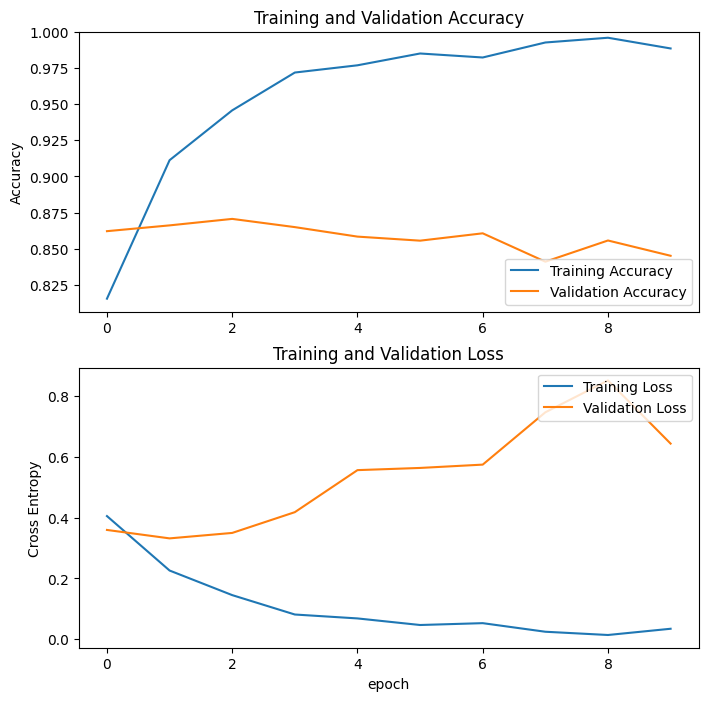

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

acc = history_LSTM.history['accuracy']
val_acc = history_LSTM.history['val_accuracy']

loss = history_LSTM.history['loss']
val_loss = history_LSTM.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()